# Estadística básica y contraste de hipótesis con Python

# 1 Preliminares

## 1.1 Librerias
Importar las librerías que se utilizarán

In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy
import scipy.stats

## 1.2 Implementar funciones de apoyo
Para generar histogramas, se puede utilizar la siguiente función:

In [2]:
def histograma(datos: any):
    plt.style.use(["seaborn-v0_8-whitegrid"])
    plt.xlim(0, max(datos))
    plt.hist(datos, bins=100)
    plt.show()

# 2 Simular datos experimentales
Para este ejemplo, se generan datos aleatorios que representan los datos obtenidos de dos experimentos. La variable `nRandomBase` representa los datos del experimento base y la variable `nRandomComp` representa los datos del experimento de comparación

In [3]:
nRandomBase = numpy.random.exponential(scale=2.5, size=100)
nRandomComp = numpy.random.exponential(scale=3.5, size=100)

## 2.1 Visualización de los datos
Siempre es conveniente "ver" el comportamiento de los datos a través de histogramas y boxplot
 

### 2.1.1 Histogramas

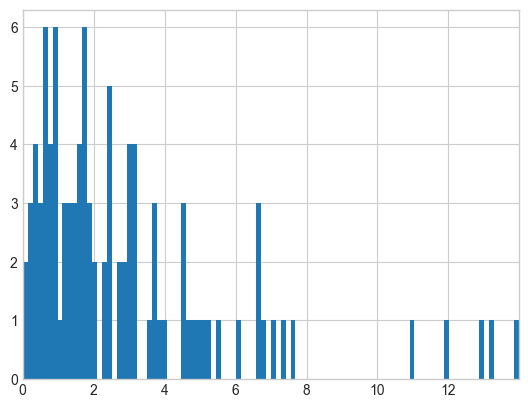

In [5]:
histograma(nRandomBase)

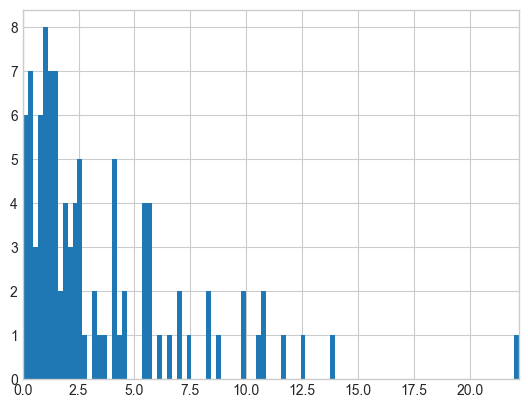

In [6]:
histograma(nRandomComp)

### 2.1.2 Boxplots

C:\Users\Angel\AppData\Local\Temp\ipykernel_12824\2436853438.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["base", "comparación"])


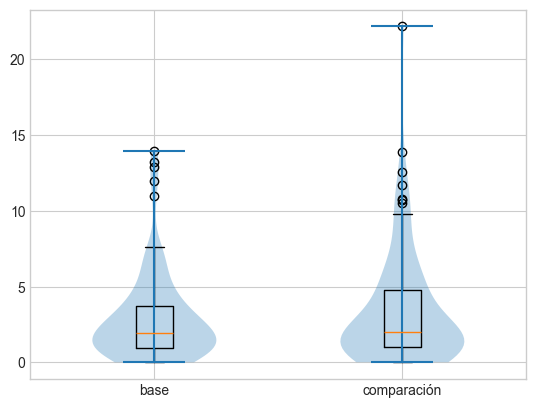

In [7]:
data = [nRandomBase, nRandomComp]
plt.boxplot(data, labels=["base", "comparación"])
plt.violinplot(data)
plt.show()


# 3 Determinar normalidad de los datos experimentales

## 3.1 Comprobar si los datos se distribuyen en forma normal
Para esta tarea, se puede utilizar la prueba estadística Shapiro-Wilk. Por omisión, esta prueba utiliza $\alpha=0.05$ . Para el contraste, se utlizan las siguientes hipótesis
* **H0**: los datos pertenecen a una distribución normal
* **H1**: los datos no pertenecen a una distribución normal

In [9]:
sh_stat, sh_pvalue = scipy.stats.shapiro(x=nRandomBase)
print(f"Datos base: Shapiro P-Value: {sh_pvalue}")

sh_stat, sh_pvalue = scipy.stats.shapiro(x=nRandomComp)
print(f"Datos comparación: Shapiro P-Value: {sh_pvalue}")

Datos base: Shapiro P-Value: 7.762004368183481e-11
Datos comparación: Shapiro P-Value: 6.8849094828986e-11


Los resultados indican que ambos conjuntos de datos no pertenecen a una distribución normal, debido a que sus P-value son menores al valor $\alpha = 0.05$. En términos formales: Si P-Value < $\alpha$, entonces hay evidencia estadística que los datos no pertenecen a una distribución normal, por lo que **H0** se rechaza y se acepta **H1**.

## 3.2 Realizar la comparación de medias de ambos conjuntos de datos (Revisar)

Debido a que por lo menos uno de los conjuntos de datos no pertenece a una distribución normal,se deben utilizar pruebas no paramétricas para comparar las medias. En este ejemplo, se utilizará la prueba `Wilcoxon Rank Sum` de comparación de medias. Por omisión, esta prueba utiliza $\alpha=0.05$ y sus hipótesis son:
* **H0**: las medias de ambos conjuntos son iguales
* **H1**: las medias de ambos conjuntos son distintas

In [10]:
rank_stat, rank_pvalue = scipy.stats.ranksums(x=nRandomBase, y=nRandomComp)
print(f"Contrastes rank P-Value: {rank_pvalue}")

Contrastes rank P-Value: 0.7194618090114608


El P-value obtenido (P-Value < $0.05$), indica que hay suficiente evidencia estadística que permite decidir que las medias de ambos conjuntos son distintas y la diferencia que presentan no se debe al azar.

## 3.2 Determinar intervalos de confianza

Por ejemplo, los intervalos de confianza permiten responder la pregunta: ¿Cuál es el rango del promedio de los datos del experimento base que permite asegurar, con un 95% de certeza, que la media de la población está en dicho rango?

In [11]:
confidence = .95
conf95 = scipy.stats.t.interval(confidence= confidence,
df = len (nRandomBase) -1,
loc = numpy.mean (nRandomBase),
scale = scipy.stats.sem (nRandomBase)
)
    
print(f"{confidence}% => {conf95}")

0.95% => (2.350237726939869, 3.510744355649667)
